Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading the dataset

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')
test_labels=pd.read_csv('/content/test_labels.csv')

In [ ]:
#Merge the test_data with the test_labels on the 'id' column
test_data = pd.merge(test_data, test_labels, on='id')

Checking the structure of the datasets

In [ ]:
train_data.head()  # First few rows of the train data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test_data.head()  # First few rows of the test data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [ ]:
sample_submission.head()  # First few rows of the sample submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:
# Extract the labels (toxic-related columns) for multi-label classification
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

prepare training data

In [ ]:
train_data['target'] = train_data[label_columns].any(axis=1).astype(int)  # Create a binary target column
X_train = train_data['comment_text']  # Features (text comments)
y_train = train_data[label_columns].values  # Labels (binary)

prepare testing data

In [ ]:
print(test_labels.columns)

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


In [ ]:
X_test = test_data['comment_text']  # Features (text comments)
y_test = test_data[[ 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']].values

Exploratory Data Analysis

1. Data Overview

In [ ]:
train_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,target
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.101679
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2(a). Checking for missing values in the dataset

In [ ]:
missing_values = train_data.isnull().sum()
print(missing_values)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
target           0
dtype: int64


2(b). Visualizing missing values as a heatmap

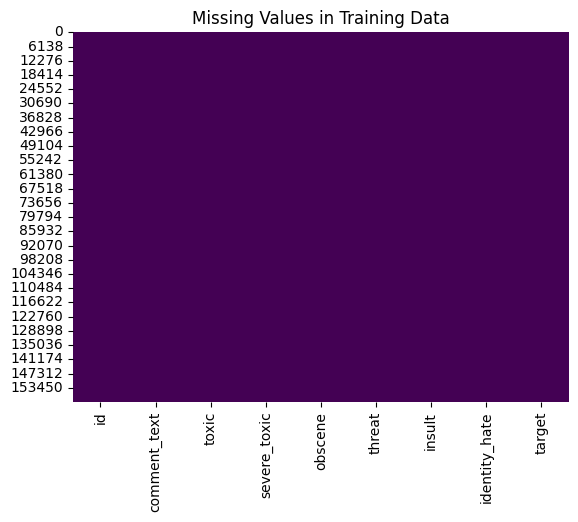

In [ ]:
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

3. Class Distribution

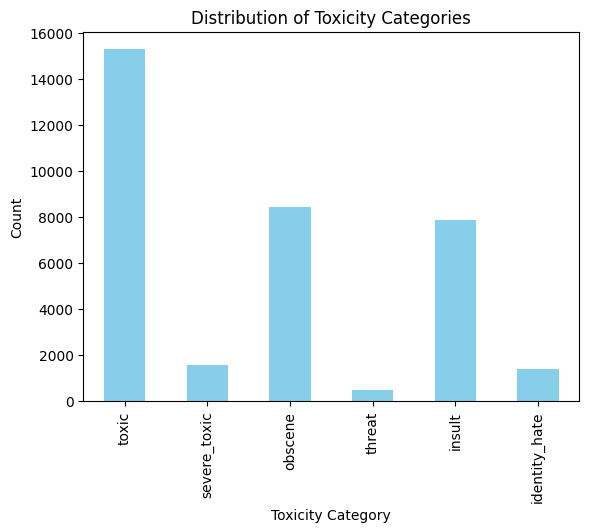

In [ ]:
# Check the distribution of each label
train_data[label_columns].sum().plot(kind='bar', color='skyblue')
plt.title('Distribution of Toxicity Categories')
plt.xlabel('Toxicity Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# check the percentage of each class
class_distribution = train_data[label_columns].sum() / len(train_data) * 100
print(class_distribution)

toxic            9.584448
severe_toxic     0.999555
obscene          5.294822
threat           0.299553
insult           4.936361
identity_hate    0.880486
dtype: float64


4. Comment Length Distribution

In [ ]:
# Add a new column for comment length
train_data['comment_length'] = train_data['comment_text'].apply(lambda x: len(x.split()))

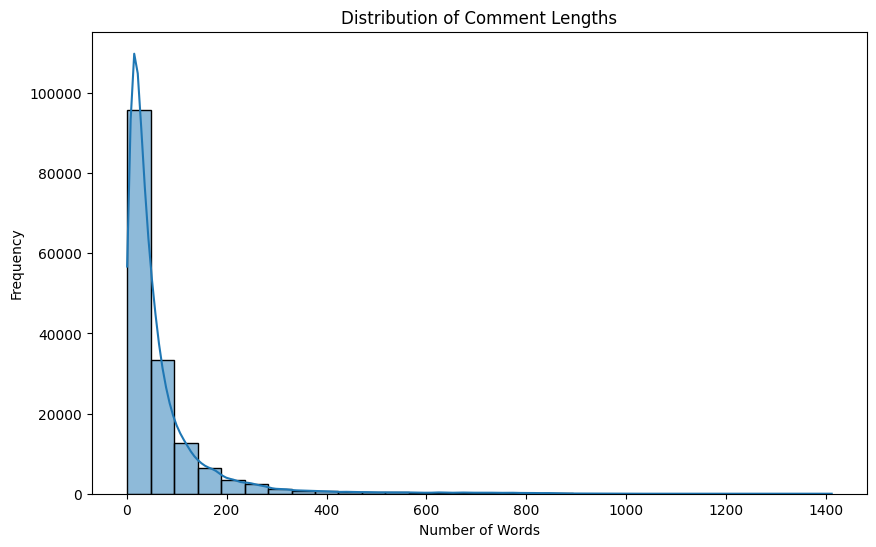

In [ ]:
# Plot distribution of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_data['comment_length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Check for outliers in comment lengths
print(train_data['comment_length'].describe())

count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: comment_length, dtype: float64


5. Word Clouds for Toxic and Non-Toxic Comments

In [ ]:
from wordcloud import WordCloud

# Toxic comments word cloud (comments with any toxic label)
toxic_comments = train_data[train_data[label_columns].any(axis=1)]['comment_text']
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black').generate(' '.join(toxic_comments))

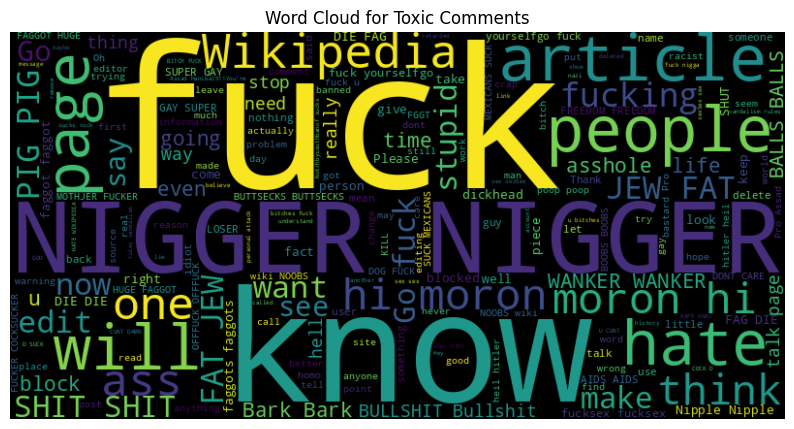

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

In [ ]:
# Non-toxic comments word cloud (comments with no toxic labels)
non_toxic_comments = train_data[train_data[label_columns].sum(axis=1) == 0]['comment_text']
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_toxic_comments))

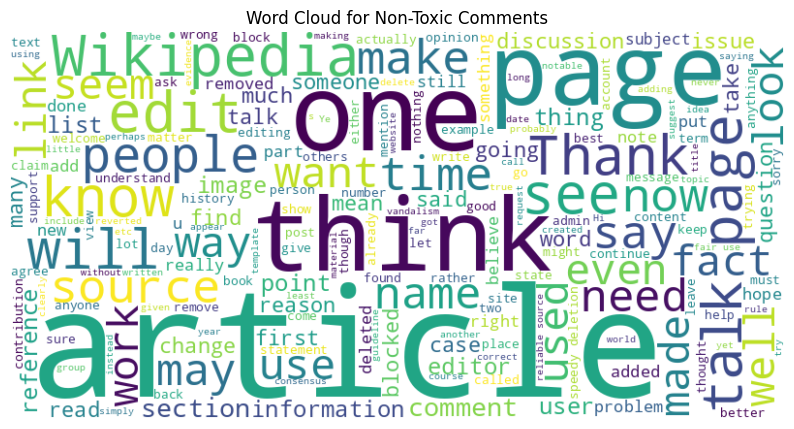

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

Data Pre-Processing

In [ ]:
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

1. Text Cleaning

In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    return text

In [ ]:
train_data['comment_text'] = train_data['comment_text'].apply(clean_text)

2. Tokenization

In [ ]:
num_words=20000
tokenizer = Tokenizer(num_words)  # Only the top 20,000 words
tokenizer.fit_on_texts(train_data['comment_text'])
X_train = tokenizer.texts_to_sequences(train_data['comment_text'])
X_test = tokenizer.texts_to_sequences(test_data['comment_text'])

In [ ]:
import pickle

# Assuming `tokenizer` is your fitted Tokenizer instance
with open('tokenizer1.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from google.colab import files

files.download('tokenizer1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3. Padding

In [ ]:
maxlen = 200  # Maximum length of input sequences
X_train= pad_sequences(X_train, padding='post', maxlen=maxlen,truncating='post')
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen,truncating='post')

In [ ]:
# Output the shapes to verify
print(f'Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}')

Train data shape: (159571, 200), Train labels shape: (159571, 6)
Test data shape: (153164, 200)


4. Handling Imbalance Data

In [ ]:
# Handle class imbalance
# Calculate class weights
from sklearn.utils import class_weight

y_train_argmax = np.argmax(y_train, axis=1)  # Convert to single-label for class weight calculation
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_argmax), y=y_train_argmax)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

5. Splitting the data

In [ ]:
# Split the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Model Development

In [ ]:
! pip install keras-tuner --upgrade
!pip install scikeras tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, Bidirectional, Embedding, MaxPooling1D, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

1. Simple Neural Network(ANN)

In [ ]:
#define ANN model
def ann_model(hp):
    model = Sequential()
    # Tune the embedding dimensions
    embedding_dim = hp.Int('embedding_dim', min_value=64, max_value=256, step=64)
    model.add(Embedding(input_dim=20000, output_dim=embedding_dim))

    model.add(Flatten())

    # Tune the number of units in the Dense layer
    dense_units = hp.Int('dense_units', min_value=32, max_value=128, step=32)
    model.add(Dense(dense_units, activation='relu'))

    # Output layer for binary classification
    model.add(Dense(6, activation='sigmoid'))

    # Tune the learning rate for the Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Adjust learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the tuner
tuner = kt.RandomSearch(
    ann_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # Each model will be trained twice
    directory='ann_tuning',
    project_name='ann_tuning'
)

In [ ]:
# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Trial 10 Complete [00h 00m 51s]
val_accuracy: 0.9937019944190979

Best val_accuracy So Far: 0.994046688079834
Total elapsed time: 00h 09m 00s


In [ ]:
# Get the best model
ann_best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#display the model summary
ann_best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 96)                  │       2,457,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             582 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,018,278 (19.14 MB)

 Trainable params: 5,018,278 (19.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann_best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(ann_best_hyperparameters.values)

Best Hyperparameters:
{'embedding_dim': 128, 'dense_units': 96}


In [ ]:
# Train the best model
ann_best_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9939 - loss: 0.0650 - val_accuracy: 0.9940 - val_loss: 0.0596
Epoch 2/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9921 - loss: 0.0516 - val_accuracy: 0.9935 - val_loss: 0.0578
Epoch 3/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9777 - loss: 0.0450 - val_accuracy: 0.9653 - val_loss: 0.0546
Epoch 4/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9593 - loss: 0.0398 - val_accuracy: 0.9395 - val_loss: 0.0546
Epoch 5/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9364 - loss: 0.0362 - val_accuracy: 0.9310 - val_loss: 0.0564


In [ ]:
# Evaluate the best model on the test set
test_loss, test_accuracy = ann_best_model.evaluate(X_test, y_test)
print(f"\nANN Test Accuracy: {test_accuracy:.4f}")

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9429 - loss: -3.5666

ANN Test Accuracy: 0.9427


In [ ]:
# Predict the test set
y_pred_probs = ann_best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred,target_names=label_columns))

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

Classification Report:
               precision    recall  f1-score   support

        toxic       0.16      0.75      0.26      6090
 severe_toxic       0.11      0.29      0.16       367
      obscene       0.15      0.68      0.25      3691
       threat       0.09      0.00      0.01       211
       insult       0.14      0.64      0.22      3427
identity_hate       0.12      0.01      0.02       712

    micro avg       0.15      0.65      0.24     14498
    macro avg       0.13      0.40      0.15     14498
 weighted avg       0.15      0.65      0.23     14498
  samples avg       0.03      0.03      0.02     14498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2. Convolutional Neural Network(CNN)

In [ ]:
# CNN Model
def cnn_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))

    # Tune the number of filters and kernel size
    for i in range(hp.Int('num_conv_layers', 1, 3)):  # 1 to 3 convolutional layers
        model.add(Conv1D(filters=hp.Int('filters_' + str(i), 32, 256, step=32),  # 32 to 256 filters
                         kernel_size=hp.Int('kernel_size_' + str(i), 3, 7),  # Kernel size 3 to 7
                         activation='relu'))
        model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())

    # Tune the number of neurons in the dense layer
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))

    # Add dropout for regularization
    model.add(Dropout(hp.Float('dropout_rate', 0.0, 0.5, step=0.1)))

    model.add(Dense(6, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Set up the tuner
tuner = kt.RandomSearch(
    cnn_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train each model
    directory='cnn_tuning',  # Directory to store results
    project_name='cnn_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Start the hyperparameter search
tuner.search(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Trial 10 Complete [00h 01m 56s]
val_accuracy: 0.9941093325614929

Best val_accuracy So Far: 0.9941093325614929
Total elapsed time: 00h 15m 53s


In [ ]:
# Get the best model
cnn_best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#display the model summary
cnn_best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 198, 32)             │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 99, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 97, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 48, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 96)                  │         147,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             582 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,723,558 (10.39 MB)

 Trainable params: 2,723,558 (10.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters: ", cnn_best_hyperparameters.values)

Best Hyperparameters:  {'num_conv_layers': 2, 'filters_0': 32, 'kernel_size_0': 3, 'dense_units': 96, 'dropout_rate': 0.2, 'learning_rate': 0.00019865609830866177, 'filters_1': 32, 'kernel_size_1': 3}


In [ ]:
#Train the best model
cnn_best_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9218 - loss: 0.0504 - val_accuracy: 0.9941 - val_loss: 0.0485
Epoch 2/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9633 - loss: 0.0437 - val_accuracy: 0.9941 - val_loss: 0.0485
Epoch 3/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9645 - loss: 0.0397 - val_accuracy: 0.9939 - val_loss: 0.0499
Epoch 4/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9564 - loss: 0.0353 - val_accuracy: 0.9871 - val_loss: 0.0526
Epoch 5/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8830 - loss: 0.0321 - val_accuracy: 0.8748 - val_loss: 0.0582


In [ ]:
 # Evaluate the best model on the test set
test_loss, test_accuracy = cnn_best_model.evaluate(X_test, y_test)
print(f"\nCNN Test Accuracy: {test_accuracy:.4f}")

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8965 - loss: -5.3998

CNN Test Accuracy: 0.8953


In [ ]:
# Predict the test set
y_pred_probs = cnn_best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred,target_names=label_columns))

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

Classification Report:
               precision    recall  f1-score   support

        toxic       0.15      0.80      0.25      6090
 severe_toxic       0.10      0.35      0.15       367
      obscene       0.15      0.75      0.25      3691
       threat       0.00      0.00      0.00       211
       insult       0.14      0.59      0.22      3427
identity_hate       0.12      0.00      0.01       712

    micro avg       0.15      0.68      0.24     14498
    macro avg       0.11      0.42      0.15     14498
 weighted avg       0.14      0.68      0.23     14498
  samples avg       0.03      0.03      0.03     14498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

3. Long Short-Term Memory (LSTM)

In [ ]:
# LSTM Model
def lstm_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))

    # Tune the number of LSTM units
    model.add(LSTM(hp.Int('lstm_units', 32, 256, step=32), return_sequences=False))  # LSTM units

    # Add dropout for regularization
    model.add(Dropout(hp.Float('dropout_rate', 0.0, 0.5, step=0.1)))

    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))  # Dense units
    model.add(Dense(6, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Set up the tuner
tuner = kt.RandomSearch(
    lstm_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train each model
    directory='lstm_tuning',  # Directory to store results
    project_name='lstm_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Start the hyperparameter search
tuner.search(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Trial 10 Complete [00h 02m 55s]
val_accuracy: 0.9941093325614929

Best val_accuracy So Far: 0.9941093325614929
Total elapsed time: 00h 42m 41s


In [ ]:
 # Get the best model
best_lstm_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#Display the model summary
best_lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,695,910 (10.28 MB)

 Trainable params: 2,695,910 (10.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_lstm_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters: ", best_lstm_hyperparameters.values)

Best Hyperparameters:  {'lstm_units': 128, 'dropout_rate': 0.4, 'dense_units': 32, 'learning_rate': 0.00039226040066920405}


In [ ]:
#Train the model
best_lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9874 - loss: 0.1427 - val_accuracy: 0.9941 - val_loss: 0.1350
Epoch 2/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9924 - loss: 0.0961 - val_accuracy: 0.9941 - val_loss: 0.0522
Epoch 3/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9938 - loss: 0.0511 - val_accuracy: 0.9941 - val_loss: 0.0550
Epoch 4/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9940 - loss: 0.0490 - val_accuracy: 0.9941 - val_loss: 0.0496
Epoch 5/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.9941 - loss: 0.0432 - val_accuracy: 0.9941 - val_loss: 0.0497


In [ ]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_lstm_model.evaluate(X_test, y_test)
print(f"\nLSTM Test Accuracy: {test_accuracy:.4f}")

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9991 - loss: -3.9144

LSTM Test Accuracy: 0.9990


In [ ]:
# Predict the test set
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred,target_names=label_columns))

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step

Classification Report:
               precision    recall  f1-score   support

        toxic       0.14      0.86      0.24      6090
 severe_toxic       0.13      0.07      0.09       367
      obscene       0.15      0.76      0.25      3691
       threat       0.00      0.00      0.00       211
       insult       0.13      0.67      0.21      3427
identity_hate       0.00      0.00      0.00       712

    micro avg       0.14      0.72      0.23     14498
    macro avg       0.09      0.39      0.13     14498
 weighted avg       0.13      0.72      0.22     14498
  samples avg       0.03      0.03      0.03     14498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

4. Bidirectional LSTM(BiLSTM)

In [ ]:
# BiLSTM Model
def bilstm_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))

    # Tune the number of LSTM units
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', 32, 256, step=32), return_sequences=False)))  # BiLSTM units

    # Add dropout for regularization
    model.add(Dropout(hp.Float('dropout_rate', 0.0, 0.5, step=0.1)))

    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))  # Dense units
    model.add(Dense(6, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Set up the tuner
tuner = kt.RandomSearch(
    bilstm_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train each model
    directory='bilstm_tuning',  # Directory to store results
    project_name='bilstm_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Start the hyperparameter search
tuner.search(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Trial 10 Complete [00h 06m 38s]
val_accuracy: 0.9941093325614929

Best val_accuracy So Far: 0.9941093325614929
Total elapsed time: 00h 57m 24s


In [ ]:
# Get the best model
best_bilstm_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#Display the model summary
best_bilstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,663,142 (10.16 MB)

 Trainable params: 2,663,142 (10.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_bilstm_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters: ", best_bilstm_hyperparameters.values)

Best Hyperparameters:  {'lstm_units': 64, 'dropout_rate': 0.2, 'dense_units': 32, 'learning_rate': 0.0018940250585117665}


In [ ]:
best_bilstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.9940 - loss: 0.0459 - val_accuracy: 0.9927 - val_loss: 0.0474
Epoch 2/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9905 - loss: 0.0391 - val_accuracy: 0.9904 - val_loss: 0.0481
Epoch 3/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.9880 - loss: 0.0331 - val_accuracy: 0.9934 - val_loss: 0.0507
Epoch 4/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.8933 - loss: 0.0285 - val_accuracy: 0.9424 - val_loss: 0.0544
Epoch 5/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.8187 - loss: 0.0240 - val_accuracy: 0.9851 - val_loss: 0.0571


In [ ]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_bilstm_model.evaluate(X_test, y_test)
print(f"\nBiLSTM Test Accuracy: {test_accuracy:.4f}")

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.9792 - loss: -5.1054

BiLSTM Test Accuracy: 0.9787


In [ ]:
# Predict the test set
y_pred_probs = best_bilstm_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred,target_names=label_columns))

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step

Classification Report:
               precision    recall  f1-score   support

        toxic       0.14      0.85      0.25      6090
 severe_toxic       0.10      0.49      0.17       367
      obscene       0.14      0.76      0.23      3691
       threat       0.16      0.30      0.21       211
       insult       0.14      0.66      0.24      3427
identity_hate       0.14      0.27      0.19       712

    micro avg       0.14      0.74      0.24     14498
    macro avg       0.14      0.56      0.21     14498
 weighted avg       0.14      0.74      0.24     14498
  samples avg       0.03      0.03      0.03     14498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Make Predictions

In [ ]:
# Make predictions
predictions = best_bilstm_model.predict(X_test)

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step


In [ ]:
# Save the model
best_bilstm_model.save('best_bilstm_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Download the model
from google.colab import files
files.download('best_bilstm_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Save the updated submission file

In [ ]:
# Assuming 'label_columns' contains the 6 label names
for i, label in enumerate(label_columns):
    sample_submission[label] = predictions[:, i]

# Save to a new CSV file
sample_submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files

# Download the file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>